In [1]:
import nc_time_axis
import numpy as np
import xarray as xr
import matplotlib.pyplot as plt

from hyblim.utils import metric

In [2]:
nino_frcst = xr.open_dataset('../../models/lim/cslim_ssta-ssha/metrics/nino_frcst_1601-1801.nc')
nino_target = xr.open_dataset('../../models/lim/cslim_ssta-ssha/metrics/nino_target_1601-1801.nc')

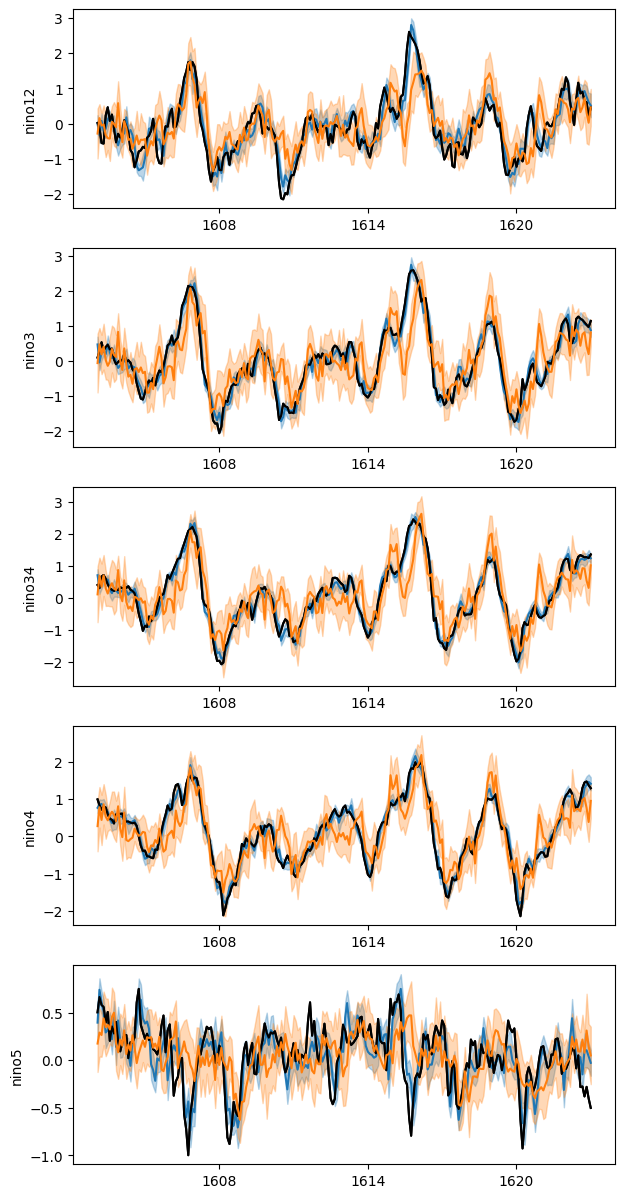

In [3]:
# Plot Nino indices
nrows = len(nino_target.data_vars)
fig, axs = plt.subplots(nrows, 1, figsize=(7, 3*nrows))

for i, var in enumerate(nino_target.data_vars):
    ax = axs[i]
    for lag in [1, 6]:
        target = nino_target[var].isel(time=slice(None, 240)).sel(lag=lag)
        frcst = nino_frcst[var].isel(time=slice(None, 240)).sel(lag=lag)
        ax.plot(target.time, target, color='k', label='target')
        pl = ax.plot(frcst.time.values, frcst.mean('member'), label=f'lag={lag}')
        ax.fill_between(frcst.time.values, frcst.mean('member') - frcst.std('member'),
                        frcst.mean('member') + frcst.std('member'), color=pl[0].get_color(), alpha=0.3)
    ax.set_ylabel(var)

## Scores

In [4]:
nino_scores, nino_scores_month = metric.time_series_score(nino_frcst, nino_target)

/etc/ecmwf/nfs/dh1_home_a/ecm1922/Code/hybridLIM/hyblim/utils/metric.py:208: FutureWarning: The return type of `Dataset.dims` will be changed to return a set of dimension names in future, in order to be more consistent with `DataArray.dims`. To access a mapping from dimension names to lengths, please use `Dataset.sizes`.
  n_members = frcst.dims['member']


(0.0, 1.2)

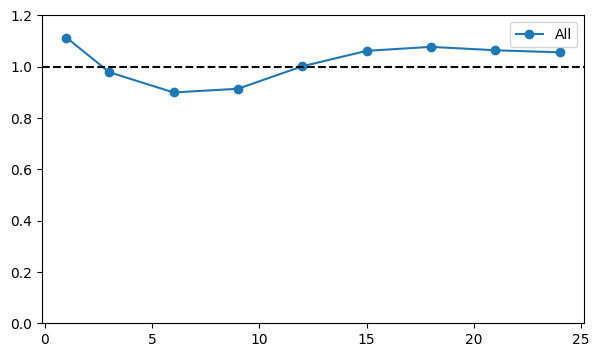

In [17]:
fig, ax = plt.subplots(1, 1, figsize=(7, 4))
skill_spread = nino_scores_month['spread_skill']['nino34']
skill_spread = nino_scores['spread_skill']['nino34']
ax.plot(skill_spread.lag, skill_spread, 'o-', label='All')
ax.axhline(1.0, color='k', linestyle='--')
ax.legend()
ax.set_ylim(0, 1.2)

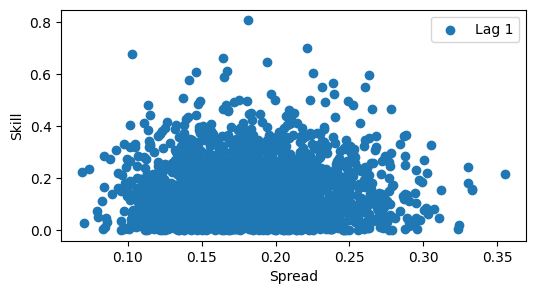

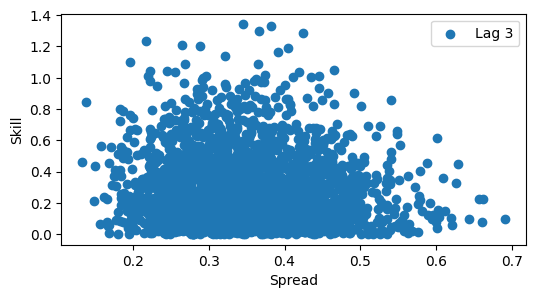

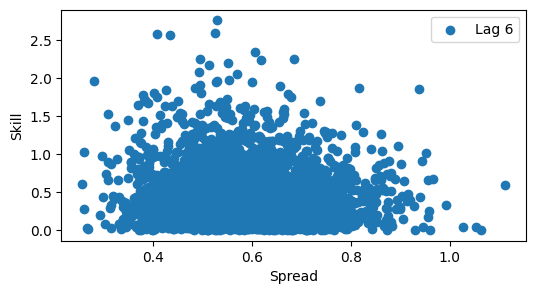

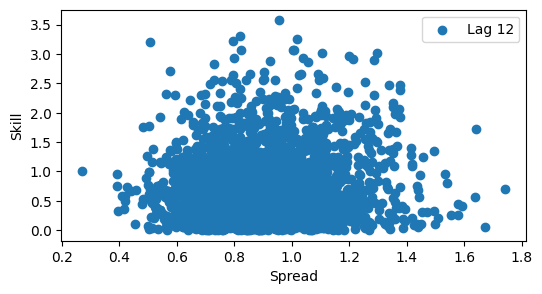

In [8]:
for lag in [1, 3, 6, 12]:
    spread = nino_frcst.sel(lag=lag).std(dim='member') 
    skill = np.abs(nino_frcst.sel(lag=lag).mean(dim='member') - nino_target.sel(lag=lag))

    fig, ax = plt.subplots(1, 1, figsize=(6, 3))
    ax.scatter(spread['nino34'].values, skill['nino34'].values, label=f"Lag {lag}")
    ax.legend()
    ax.set_xlabel('Spread')
    ax.set_ylabel('Skill')